In [115]:
import getpass
import os
import sys
import time

import matplotlib.pyplot as plt
import pandas as pd
import pykeen
import torch
from pykeen.pipeline import pipeline

%matplotlib inline

In [2]:
print(sys.version)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


In [3]:
print(time.asctime())

Sun Mar 14 20:22:22 2021


In [4]:

print(getpass.getuser())

shahz


In [5]:
print(pykeen.get_version(with_git_hash=True))

1.4.0-UNHASHED


In [6]:
result = pipeline(
    dataset='Nations',
    model='RotatE',
    random_seed=1235,
    device='cpu',
    training_kwargs=dict(num_epochs=100),  # Shouldn't take more than a minute or two on a nice computer
)

C:\Users\shahz\anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds


In [7]:
result

PipelineResult(random_seed=1235, model=RotatE(
  (loss): MarginRankingLoss()
  (regularizer): NoRegularizer()
  (entity_embeddings): Embedding(
    (_embeddings): Embedding(14, 400)
  )
  (relation_embeddings): Embedding(
    (_embeddings): Embedding(55, 400)
  )
), training_loop=<pykeen.training.slcwa.SLCWATrainingLoop object at 0x000001DDA70C2FD0>, losses=[0.004362222462443251, 0.004279505367854133, 0.004190522821704347, 0.00415098277767699, 0.004086745893535902, 0.004032049271928605, 0.0039364126085036965, 0.0038983375208461704, 0.003837279900534069, 0.003818197166500379, 0.0037511558688465675, 0.003789631565611566, 0.0037494035596823574, 0.003650600249743342, 0.0036557899348100826, 0.0036934994572970135, 0.0038585387282635097, 0.0036518981483713467, 0.0036909988327841065, 0.0036164818696640243, 0.003702789320418583, 0.003640433651718063, 0.003602575679220746, 0.003655036302966688, 0.0035636409293467075, 0.0036345944557357674, 0.0035973772706098892, 0.003701441813653438, 0.003551757

In [8]:
save_location = 'nations_transe'  # relative to here
result.save_to_directory(save_location)
os.listdir(save_location)

['metadata.json', 'results.json', 'trained_model.pkl']

In [9]:
# How to look at the model
model = result.model
model

RotatE(
  (loss): MarginRankingLoss()
  (regularizer): NoRegularizer()
  (entity_embeddings): Embedding(
    (_embeddings): Embedding(14, 400)
  )
  (relation_embeddings): Embedding(
    (_embeddings): Embedding(55, 400)
  )
)

In [10]:
# How to look at the triples
tf = model.triples_factory
tf

TriplesFactory(num_entities=14, num_relations=55, num_triples=1592, inverse_triples=False, path="C:\Users\shahz\anaconda3\lib\site-packages\pykeen\datasets\nations\train.txt")

In [11]:
tf.num_entities, tf.num_relations, tf.num_triples

(14, 55, 1592)

AttributeError: 'NoneType' object has no attribute 'set_ylabel'

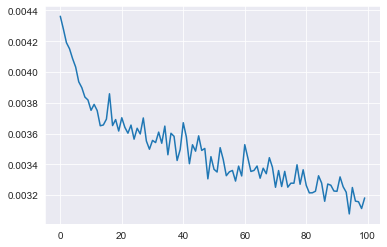

In [12]:
result.plot_losses()
plt.show()

In [13]:
result.metric_results.to_df()

,Side,Type,Metric,Value
0,tail,avg,adjusted_mean_rank,0.720611
1,both,avg,adjusted_mean_rank,0.839738
2,head,avg,adjusted_mean_rank,0.958865
3,tail,worst,mean_rank,3.462687
4,tail,worst,mean_reciprocal_rank,0.508827
5,tail,worst,hits_at_1,0.293532
6,tail,worst,hits_at_3,0.641791
7,tail,worst,hits_at_5,0.796020
8,tail,worst,hits_at_10,0.965174
9,tail,best,mean_rank,3.462687


In [59]:
import pandas as pd
data=pd.read_csv('KG_dataset_1_family_medicine.csv')

In [61]:
data

,subject,relation,object,subject_type,object_type
0,Family physicians,hold,M.D.,NOUN_CHUNK,NOUN_CHUNK
1,certification,requires,five years,NOUN_CHUNK,DATE
2,term Primary Care,include,services,NOUN_CHUNK,NOUN_CHUNK
3,Family physicians,deliver,range,NOUN_CHUNK,NOUN_CHUNK
4,family physicians,treat,patients,NOUN_CHUNK,NOUN_CHUNK
...,...,...,...,...,...
2302,the British Library,announced,support,ORG,NOUN_CHUNK
2303,process,reveal,errors,NOUN_CHUNK,NOUN_CHUNK
2304,publishers,provide,PDF,NOUN_CHUNK,NOUN_CHUNK
2305,system,provides,search capability,NOUN_CHUNK,NOUN_CHUNK


In [62]:
data=data.drop(['subject_type','object_type'], axis=1)

In [63]:
data

,subject,relation,object
0,Family physicians,hold,M.D.
1,certification,requires,five years
2,term Primary Care,include,services
3,Family physicians,deliver,range
4,family physicians,treat,patients
...,...,...,...
2302,the British Library,announced,support
2303,process,reveal,errors
2304,publishers,provide,PDF
2305,system,provides,search capability


In [ ]:
#prestratisfied data NAtions

In [71]:
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
from pykeen.datasets.nations import NATIONS_TRAIN_PATH, NATIONS_TEST_PATH
result = pipeline(
    training=NATIONS_TRAIN_PATH,
    testing=NATIONS_TEST_PATH,
    model='TransE',
    training_kwargs=dict(num_epochs=5),  # short epochs for testing - you should go higher
)
result.save_to_directory('doctests/test_pre_stratified_transe')


INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds


In [72]:
import torch

my_pykeen_model = torch.load('doctests/test_pre_stratified_transe/trained_model.pkl')

In [77]:
my_pykeen_model.relation_embeddings

Embedding(
  (_embeddings): Embedding(55, 50)
)

In [78]:
entity_embeddings: torch.FloatTensor = model.entity_embeddings()

NameError: name 'model' is not defined

In [79]:
entity_embeddings.shape

NameError: name 'entity_embeddings' is not defined

In [76]:
Nations().testing.mapped_triples

tensor([[ 0,  7,  5],
        [ 0, 14, 11],
        [ 0, 18, 12],
        [ 0, 20,  3],
        [ 0, 20, 10],
        [ 0, 21, 12],
        [ 1,  3, 12],
        [ 1,  7,  0],
        [ 1, 10, 11],
        [ 1, 18,  5],
        [ 1, 21,  6],
        [ 1, 28,  7],
        [ 1, 33,  4],
        [ 1, 33,  6],
        [ 1, 33, 13],
        [ 1, 38,  4],
        [ 1, 38,  7],
        [ 1, 38, 12],
        [ 1, 39,  7],
        [ 1, 42,  2],
        [ 1, 49,  2],
        [ 2,  0, 11],
        [ 2,  6,  0],
        [ 2, 14,  1],
        [ 2, 14,  4],
        [ 2, 14,  6],
        [ 2, 21,  5],
        [ 2, 21, 12],
        [ 2, 21, 13],
        [ 2, 26,  5],
        [ 2, 30,  1],
        [ 2, 30,  6],
        [ 2, 37,  3],
        [ 2, 37, 13],
        [ 2, 38,  0],
        [ 2, 45,  0],
        [ 3, 19, 12],
        [ 3, 21, 11],
        [ 3, 25, 11],
        [ 3, 28,  7],
        [ 3, 30,  2],
        [ 3, 33,  2],
        [ 3, 33,  4],
        [ 3, 37, 13],
        [ 3, 38,  4],
        [ 

In [102]:
df=open("train.txt")#df.split([:1000])

In [108]:
train1=data[:2000]
test1=data[2000:]

In [110]:
train1.to_csv(r'train1.txt', header=None, index=None, sep='\t')
test1.to_csv(r'test1.txt', header=None , index=None , sep='\t')

In [111]:
te=open(r'train.txt')

In [112]:
te

<_io.TextIOWrapper name='train.txt' mode='r' encoding='cp1252'>

In [10]:
#BYOData Prestratisfied

In [81]:
pykeen.datasets.nations.NATIONS_TEST_PATH

NameError: name 'pykeen' is not defined

In [113]:
NATIONS_TRAIN_PATH='C:\\Users\\shahz\\KG\\Untitled Folder\\test1.txt'
NATIONS_TEST_PATH='C:\\Users\\shahz\\KG\\Untitled Folder\\train1.txt'
result = pipeline(
    training=NATIONS_TRAIN_PATH, 
    testing=NATIONS_TEST_PATH,
    model='RotatE',
    random_seed=1235,
    device='cpu',
    training_kwargs=dict(num_epochs=100),  # Shouldn't take more than a minute or two on a nice computer
)

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds


In [116]:
save_location = 'family_Embedding_KG'  # relative to here
result.save_to_directory(save_location)
os.listdir(save_location)

['metadata.json', 'results.json', 'trained_model.pkl']

In [117]:
# How to look at the model
model = result.model
model

RotatE(
  (loss): MarginRankingLoss()
  (regularizer): NoRegularizer()
  (entity_embeddings): Embedding(
    (_embeddings): Embedding(483, 400)
  )
  (relation_embeddings): Embedding(
    (_embeddings): Embedding(154, 400)
  )
)

In [118]:
# How to look at the triples
tf = model.triples_factory
tf

TriplesFactory(num_entities=483, num_relations=154, num_triples=266, inverse_triples=False, path="C:\Users\shahz\KG\Untitled Folder\test1.txt")

AttributeError: 'NoneType' object has no attribute 'set_ylabel'

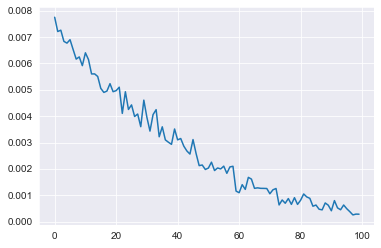

In [119]:
result.plot_losses()
plt.show()

In [120]:
result.metric_results.to_df()

,Side,Type,Metric,Value
0,both,avg,adjusted_mean_rank,0.492975
1,tail,avg,adjusted_mean_rank,0.475207
2,head,avg,adjusted_mean_rank,0.510744
3,both,avg,mean_rank,119.300000
4,both,avg,mean_reciprocal_rank,0.404692
5,both,avg,hits_at_1,0.400000
6,both,avg,hits_at_3,0.400000
7,both,avg,hits_at_5,0.400000
8,both,avg,hits_at_10,0.400000
9,both,worst,mean_rank,119.300000


In [121]:
model

RotatE(
  (loss): MarginRankingLoss()
  (regularizer): NoRegularizer()
  (entity_embeddings): Embedding(
    (_embeddings): Embedding(483, 400)
  )
  (relation_embeddings): Embedding(
    (_embeddings): Embedding(154, 400)
  )
)

In [ ]:
#unstratisfied 


In [96]:
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
from pykeen.datasets.nations import NATIONS_TRAIN_PATH
new=open('train.txt')
tf = TriplesFactory.from_path('C:\\Users\\shahz\\KG\\Untitled Folder\\train.txt')
tf
#training= tf[:1000]
#testing 
result = pipeline(
    training=training,
    testing=testing,
    model='TransE',
    training_kwargs=dict(num_epochs=5),  # short epochs for testing - you should go higher
)
result.save_to_directory('doctests/test_unstratified_transe')

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds


In [92]:
from pykeen.datasets import Nations
dataset = Nations()
training_triples_factory = dataset.training

In [99]:
tf

TriplesFactory(num_entities=3546, num_relations=783, num_triples=2231, inverse_triples=False, path="C:\Users\shahz\KG\Untitled Folder\train.txt")

In [97]:
testing

TriplesFactory(num_entities=14, num_relations=55, num_triples=319, inverse_triples=False, path="C:\Users\shahz\anaconda3\lib\site-packages\pykeen\datasets\nations\train.txt")

In [98]:
training

TriplesFactory(num_entities=14, num_relations=55, num_triples=1273, inverse_triples=False, path="C:\Users\shahz\anaconda3\lib\site-packages\pykeen\datasets\nations\train.txt")

In [100]:
train

[TriplesFactory(num_entities=14, num_relations=55, num_triples=1114, inverse_triples=False, path="C:\Users\shahz\anaconda3\lib\site-packages\pykeen\datasets\nations\train.txt"),
 TriplesFactory(num_entities=14, num_relations=55, num_triples=478, inverse_triples=False, path="C:\Users\shahz\anaconda3\lib\site-packages\pykeen\datasets\nations\train.txt")]

In [94]:
train=training_triples_factory.split([.7,.3])

INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [1047, 478]


In [95]:
train

[TriplesFactory(num_entities=14, num_relations=55, num_triples=1114, inverse_triples=False, path="C:\Users\shahz\anaconda3\lib\site-packages\pykeen\datasets\nations\train.txt"),
 TriplesFactory(num_entities=14, num_relations=55, num_triples=478, inverse_triples=False, path="C:\Users\shahz\anaconda3\lib\site-packages\pykeen\datasets\nations\train.txt")]

In [ ]:
os.listdir('doctests')

In [ ]:
# How to look at the model
model = result.model
model

In [ ]:
entity_embeddings: torch.FloatTensor = model.entity_embeddings(indices=None)

In [ ]:
entity_embeddings

In [53]:
training_triples_factory=open('train.txt')

In [50]:
#Individually pipeline
import pandas as pd
with open('train.txt', encoding='utf-8') as f:
    training_triples_factory=list(f)

In [54]:
print(training_triples_factory)

<_io.TextIOWrapper name='train.txt' mode='r' encoding='cp1252'>


In [55]:
from pykeen.models import TransE
model = TransE(triples_factory=training_triples_factory)

AttributeError: '_io.TextIOWrapper' object has no attribute 'num_entities'

In [ ]:
from torch.optim import Adam
optimizer = Adam(params=model.get_grad_params())

In [ ]:
from pykeen.training import SLCWATrainingLoop
training_loop = SLCWATrainingLoop(model=model, optimizer=optimizer)

In [ ]:
training_loop.train(num_epochs=5, batch_size=256)

In [ ]:
from pykeen.evaluation import RankBasedEvaluator
evaluator = RankBasedEvaluator()

In [ ]:
# Get triples to test
mapped_triples = dataset.testing.mapped_triples

In [ ]:
mapped_triples

In [ ]:
results = evaluator.evaluate(model, mapped_triples, batch_size=1024)
print(results)

In [ ]:

results.plot_losses()
plt.show()

In [ ]:
results

In [15]:
# Get a training dataset
from pykeen.datasets import Nations
dataset = Nations()
training_triples_factory = dataset.training

In [16]:
type(training_triples_factory)

pykeen.triples.triples_factory.TriplesFactory

In [17]:
print(dataset)

Nations(num_entities=14, num_relations=55)


In [ ]:
type(training_triples_factory)

In [ ]:
f = open("C:\\Users\\shahz\\anaconda3\\lib\\site-packages\\pykeen\\datasets\\nations\\train.txt", "r")
print(f.read())

In [ ]:
f = open("test.txt", "r", encoding="utf-8")
print(f.read())

In [ ]:
type(f)

In [ ]:
from pykeen.models import TransE
model = TransE(triples_factory='test.txt')

In [ ]:
import numpy as np
np.savetxt(r'np.txt', data.values, fmt='%s')


In [ ]:
data.to_csv('test.txt', index = False, header=False, sep='\t')

In [ ]:
pd.read_csv('test.txt')